In [3]:
!pip install sidetable
import sidetable as stb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.4 MB/s eta 0:00:00


In [4]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
import sidetable
#from pandas_profiling import ProfileReport

In [5]:
#Read in data (could be done from a file(excel/csv), API, link, or SQL dB)
#df = pd.read_csv('')
df = pd.read_csv("https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?")
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,35.0,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,35.0,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,14.0,269374108,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,213383894,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10


In [8]:
#examines the first 5 rows of data
df.shape

(200048, 17)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
#examines the column names
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [9]:
#examines the data types in each column
df.dtypes


,0
VIN (1-10),object
County,object
City,object
State,object
Postal Code,float64
Model Year,int64
Make,object
Model,object
Electric Vehicle Type,object
Clean Alternative Fuel Vehicle (CAFV) Eligibility,object


In [15]:
#describe
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,200044.000000,200048.000000,200048.000000,200048.000000,199606.000000,2.000480e+05,2.000440e+05
mean,98176.178121,2020.871261,53.485279,947.551913,28.986063,2.262988e+08,5.297545e+10
std,2424.207811,2.994933,88.786301,7860.591091,14.908108,7.282433e+07,1.605628e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.904573e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.363396e+08,5.303303e+10
75%,98372.000000,2023.000000,53.000000,0.000000,42.000000,2.609659e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [12]:
#let's count the values in the fruit column
df.Make.value_counts() # "." notation
#try the following, "bracket" notation []:
#df['Make'].value_counts()

,count
Make,
TESLA,88083
CHEVROLET,14806
NISSAN,14416
FORD,10547
KIA,8763
BMW,8295
TOYOTA,7681
VOLKSWAGEN,5565
HYUNDAI,5476


In [16]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [20]:
#What % of the market does tesla hold of the market in this dataset??
df.stb.freq(['Make'])

#resource: https://pbpython.com/sidetable.html

,Make,count,percent,cumulative_count,cumulative_percent
0,TESLA,88083,44.030933,88083,44.030933
1,CHEVROLET,14806,7.401224,102889,51.432156
2,NISSAN,14416,7.206270,117305,58.638427
3,FORD,10547,5.272235,127852,63.910661
4,KIA,8763,4.380449,136615,68.291110
5,BMW,8295,4.146505,144910,72.437615
6,TOYOTA,7681,3.839579,152591,76.277193
7,VOLKSWAGEN,5565,2.781832,158156,79.059026
8,HYUNDAI,5476,2.737343,163632,81.796369
9,JEEP,5288,2.643366,168920,84.439734


In [21]:
#examine the average range(distance a vehicle can go) across all vehicles
#--we use the mean instead of the average function here
df.groupby(['Make'])['Electric Range'].agg(['mean']).sort_values(by=['mean'],ascending=False)

,mean
Make,
JAGUAR,204.504202
WHEEGO ELECTRIC CARS,100.000000
TH!NK,100.000000
CHEVROLET,92.740105
FIAT,84.640704
NISSAN,77.645047
TESLA,69.933699
SMART,62.007874
AZURE DYNAMICS,56.000000


In [22]:
#Let's look at the Base MSRP
df.groupby(['Make'])['Base MSRP'].agg(['mean']).sort_values(by=['mean'],ascending=False)

,mean
Make,
WHEEGO ELECTRIC CARS,32995.000000
FISKER,6616.216216
MINI,5724.925816
PORSCHE,3733.032787
VOLVO,3654.047164
BMW,3203.345389
KIA,2131.878352
SUBARU,1979.151671
CADILLAC,1410.744220


In [24]:
#let's look back at our table
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,35.0,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,35.0,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,14.0,269374108,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,213383894,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10


## Let's Plot !
First let's look at the top 10 EV Makes

In [27]:
top_makes = df['Make'].value_counts().head(10)
print(top_makes)

Make
TESLA         88083
CHEVROLET     14806
NISSAN        14416
FORD          10547
KIA            8763
BMW            8295
TOYOTA         7681
VOLKSWAGEN     5565
HYUNDAI        5476
JEEP           5288
Name: count, dtype: int64


<ipython-input-28-7964a51e2996>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')


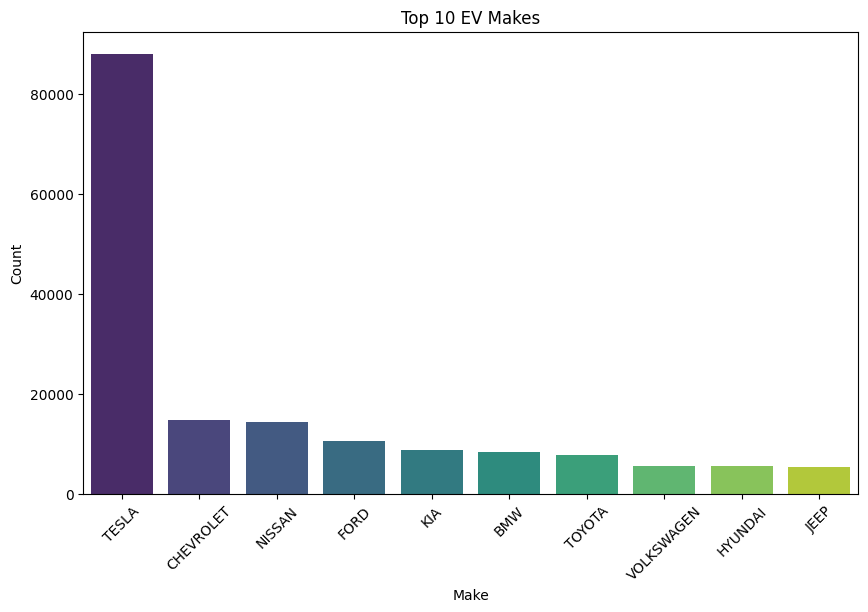

In [28]:
# Plot the top 10 EV makes
plt.figure(figsize=(10,6))
sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.title('Top 10 EV Makes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Top 10 most common EV models
top_models = df['Model'].value_counts().head(10)
print(top_models)

Model
MODEL Y           41986
MODEL 3           31609
LEAF              13496
MODEL S            7868
BOLT EV            6644
MODEL X            6187
VOLT               4830
ID.4               4484
MUSTANG MACH-E     3981
WRANGLER           3947
Name: count, dtype: int64


<ipython-input-30-52734a18ea6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')


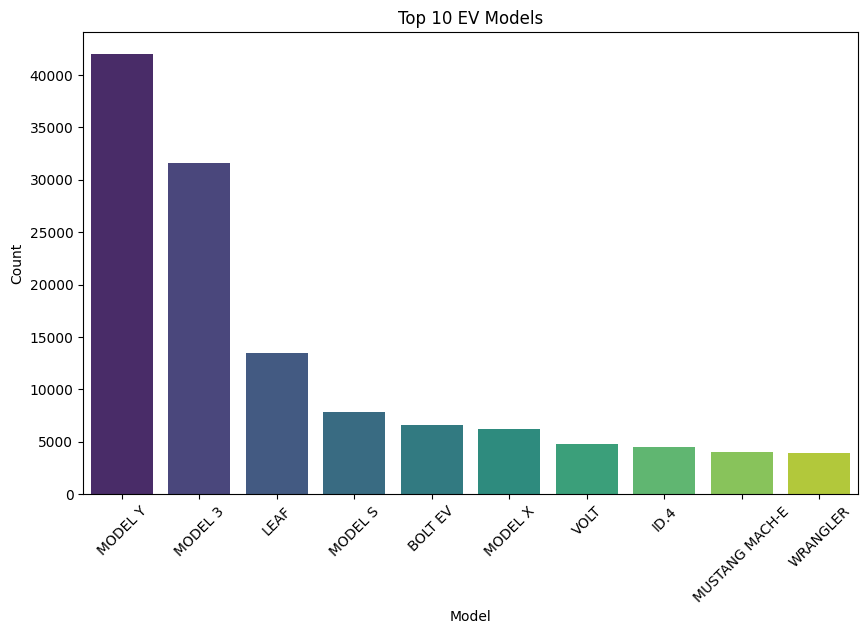

In [30]:
# Plot the top 10 EV models
plt.figure(figsize=(10,6))
sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')
plt.title('Top 10 EV Models')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Let's Visualize the Distance (Est)

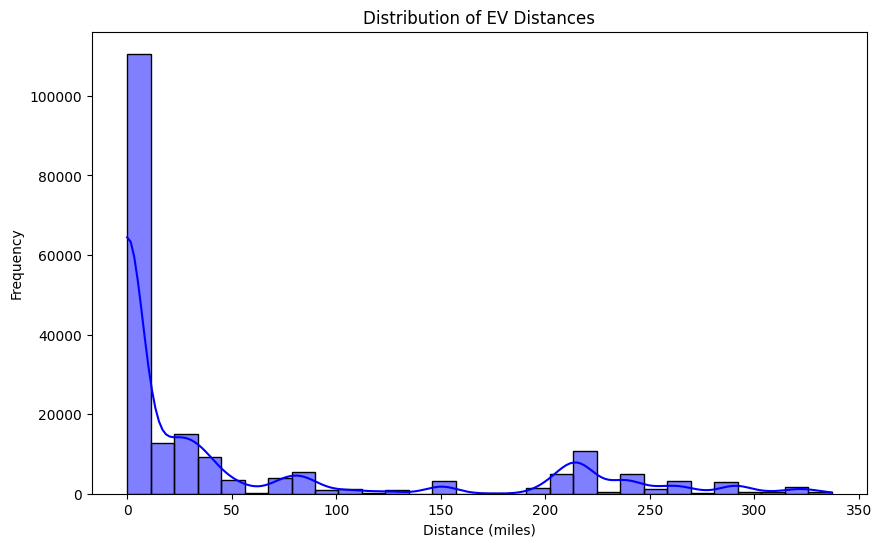

In [32]:
# Distribution of distances
plt.figure(figsize=(10,6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='blue')
plt.title('Distribution of EV Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

Reading a Box Plot :[link text](https://)

<ipython-input-35-24bd56e5e434>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Make', y='Electric Range', data=df, palette='coolwarm')


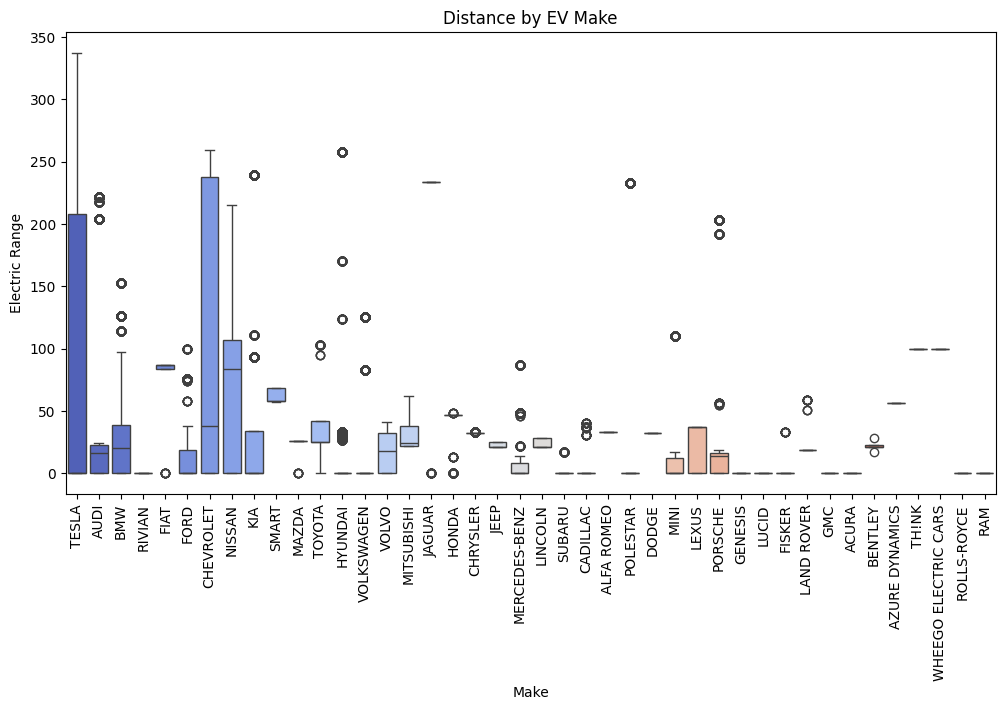

In [35]:
# Boxplot of distances by EV make
plt.figure(figsize=(12,6))
sns.boxplot(x='Make', y='Electric Range', data=df, palette='coolwarm')
plt.title('Range by EV Make')
plt.xticks(rotation=90)
plt.show()

Box and Whisker : 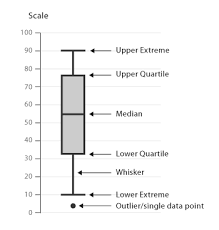

<ipython-input-38-37c48287f330>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Electric Range', data=df_top_models, palette='coolwarm')


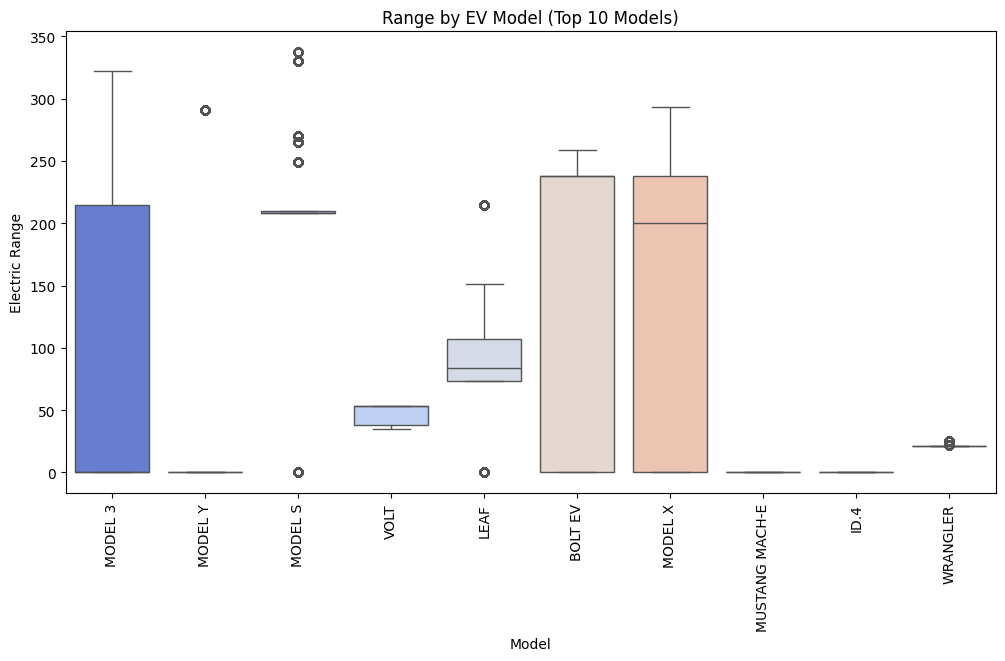

In [38]:
# Boxplot of distances by EV model (top 10 models only)
top_models_list = df['Model'].value_counts().index[:10]
df_top_models = df[df['Model'].isin(top_models_list)]

plt.figure(figsize=(12,6))
sns.boxplot(x='Model', y='Electric Range', data=df_top_models, palette='coolwarm')
plt.title('Range by EV Model (Top 10 Models)')
plt.xticks(rotation=90)
plt.show()

In [43]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)

                      Postal Code  Electric Range  Base MSRP  \
Postal Code              1.000000       -0.002271  -0.002713   
Electric Range          -0.002271        1.000000   0.112206   
Base MSRP               -0.002713        0.112206   1.000000   
Legislative District    -0.410001        0.020216   0.010583   
DOL Vehicle ID           0.007274       -0.122353  -0.036108   
2020 Census Tract        0.499061       -0.002187   0.000998   

                      Legislative District  DOL Vehicle ID  2020 Census Tract  
Postal Code                      -0.410001        0.007274           0.499061  
Electric Range                    0.020216       -0.122353          -0.002187  
Base MSRP                         0.010583       -0.036108           0.000998  
Legislative District              1.000000       -0.010254          -0.100313  
DOL Vehicle ID                   -0.010254        1.000000           0.004541  
2020 Census Tract                -0.100313        0.004541           1.

Correlation Analysis

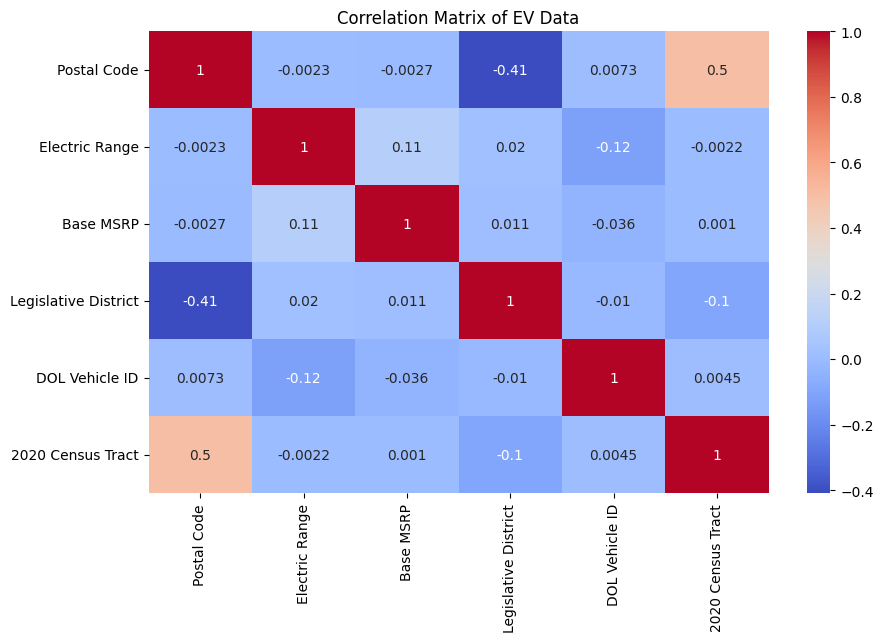

In [44]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of EV Data')
plt.show()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,35.0,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,35.0,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,14.0,269374108,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,213383894,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
